In [30]:
import matplotlib.pyplot as plt
from vitRet.data.segmentation import MaplesDR
import torch

In [47]:
datamodule = MaplesDR('/usagers/clpla/data/Maples-DR/', 
                      superpixels_nb=8192,
                      batch_size=2, num_workers=1)
datamodule.setup('fit')
daloader = datamodule.train_dataloader()

In [48]:
batch = next(iter(daloader))

gt = batch['label']
segment = batch['segments']

In [49]:
from torch_scatter import scatter_add

output = scatter_add(gt.flatten(-2), segment.unsqueeze(1).flatten(2), dim=-1)
output[:, -1] = torch.all(output[:, :-1]==0, dim=1)
gt_segment = output.argmax(1)

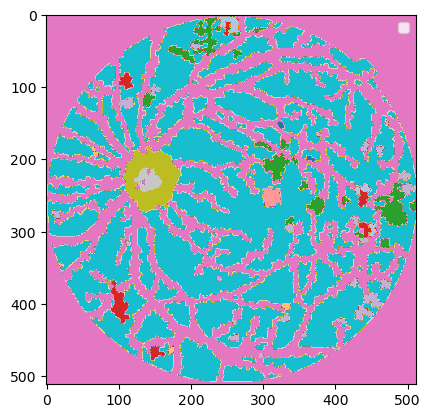

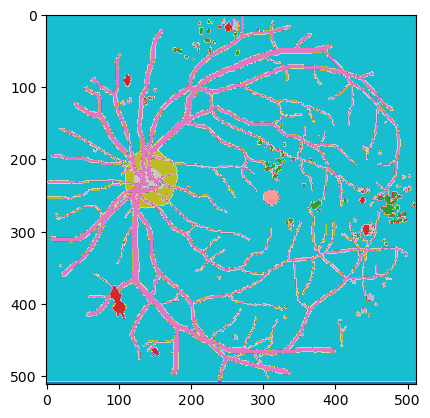

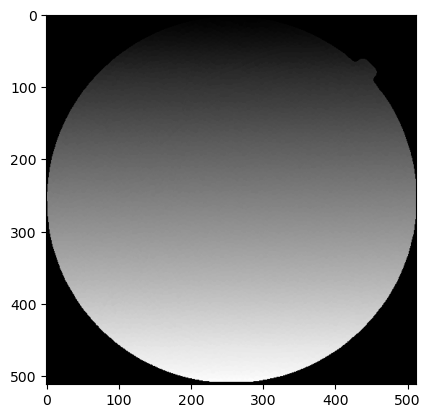

In [50]:
reconstructed_gt = torch.gather(gt_segment, 1, segment.flatten(1)).view(-1, *segment.shape[-2:])
plt.imshow(reconstructed_gt[0], vmax=13, vmin=0, cmap='tab20')
plt.legend()
plt.show()
plt.imshow(gt.argmax(1)[0], vmax=13, vmin=0, cmap='tab20')
plt.show()
plt.imshow(segment[0])
plt.show()